In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

#### 체리부로 8/18 ~ 9/9 평균 픽셀

In [5]:
# pixel 데이터 로드
df = pd.read_csv("./data/pixel_data.csv")
df.shape

(31, 3)

In [6]:
df.columns = ['date','pixel', 'raw']
df['date'] = df['date'].astype('str')
df['date'] = pd.to_datetime(df['date'])

In [7]:
pixel_sort_values = df.sort_values(by=["date"], ascending=[True])
pixel_sort_values

,date,pixel,raw
2,2021-08-17 17:54:22,1859.0,"[True, True, True, False, False, True, True, T..."
3,2021-08-19 16:48:31,1771.0,"[True, True, False, False, True, True, True, F..."
1,2021-08-20 15:46:43,1935.0,"[True, False, True, True, True, True, False, T..."
0,2021-08-21 15:48:19,1866.0,"[True, True, True, True, True, True, True, Tru..."
5,2021-08-22 15:54:18,1946.0,"[True, True, True, True, True, True, True, Tru..."
4,2021-08-23 13:01:01,2137.0,"[True, True, True, True, True, True, True, Tru..."
14,2021-08-24 09:48:20,2091.0,"[False, True, False, True, True, True, True, T..."
12,2021-08-25 15:47:09,2158.0,"[True, True, True, True, True, True, True, Tru..."
13,2021-08-26 15:52:19,2254.0,"[True, True, True, False, True, True, True, Tr..."
6,2021-08-27 15:52:28,2183.0,"[False, True, True, True, True, False, True, T..."


In [8]:
# 체리부로 실제 무게 데이터 로드
chery = pd.read_csv("./data/chery_real_weight.csv", encoding='cp949')
chery.shape

(3, 3)

In [9]:
chery.columns = ['date','weight','number']

In [10]:
chery['date'] = pd.to_datetime(chery['date'], infer_datetime_format=True)
chery

,date,weight,number
0,2021-08-16,192,8
1,2021-08-23,378,15
2,2021-08-30,556,22


Text(0, 0.5, 'weight')

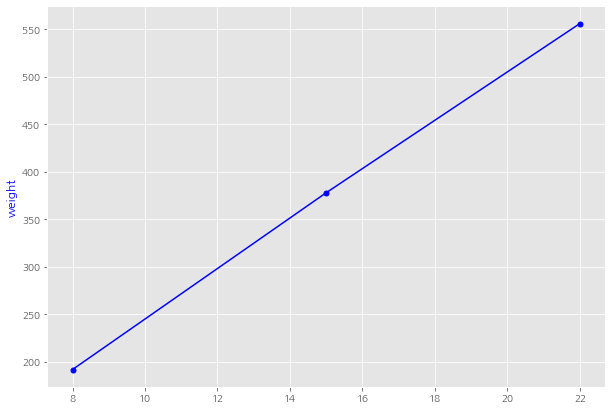

In [11]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(chery['number'], chery['weight'], marker='o', markersize=5, color='blue')
#ax1.plot(chery_sort_values['date'], chery_sort_values['weight'], marker='o', markersize=5, color='blue')
ax1.set_ylabel('weight', color='blue')

In [19]:
weight_list = []
num_list = []
for i in range(8, 39) :
    y = round(((378-192)/(15-8)) * i + 192 - ((378-192)/(15-8)) * 8, 1)
    print(i, y)
    weight_list.append(y)
    num_list.append(i)
    i+=1
    
len(weight_list)

8 192.0
9 218.6
10 245.1
11 271.7
12 298.3
13 324.9
14 351.4
15 378.0
16 404.6
17 431.1
18 457.7
19 484.3
20 510.9
21 537.4
22 564.0
23 590.6
24 617.1
25 643.7
26 670.3
27 696.9
28 723.4
29 750.0
30 776.6
31 803.1
32 829.7
33 856.3
34 882.9
35 909.4
36 936.0
37 962.6
38 989.1


31

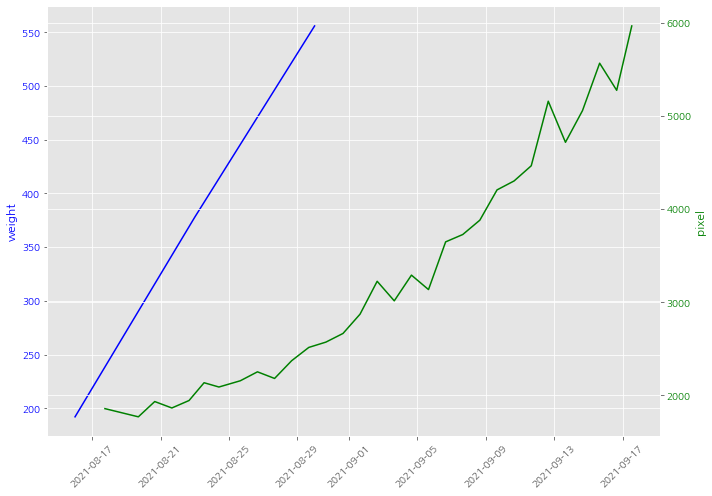

In [14]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(chery['date'], chery['weight'], color='blue')
#ax1.plot(chery_sort_values['date'], chery_sort_values['weight'], marker='o', markersize=5, color='blue')
ax1.set_ylabel('weight', color='blue')  
dateFmt = mdates.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(dateFmt)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('pixel', color='green')  
ax2.plot(pixel_sort_values['date'], pixel_sort_values['pixel'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_target = weight_list
X_data = np.array(pixel_sort_values['pixel'].tolist())

print(y_target)
print(len(y_target))
print(type())
print("------------")
print(X_data)
print(len(X_data))

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

[192.0, 218.6, 245.1, 271.7, 298.3, 324.9, 351.4, 378.0, 404.6, 431.1, 457.7, 484.3, 510.9, 537.4, 564.0, 590.6, 617.1, 643.7, 670.3, 696.9, 723.4, 750.0, 776.6, 803.1, 829.7, 856.3, 882.9, 909.4, 936.0, 962.6, 989.1]
31
------------
[1859. 1771. 1935. 1866. 1946. 2137. 2091. 2158. 2254. 2183. 2373. 2516.
 2573. 2666. 2873. 3226. 3016. 3292. 3137. 3649. 3728. 3882. 4207. 4303.
 4466. 5159. 4718. 5058. 5567. 5276. 5967.]
31


ValueError: Expected 2D array, got 1D array instead:
array=[3292. 2873. 4466. 1946. 1935. 4718. 2091. 2666. 2158. 5567. 1771. 3016.
 1859. 3226. 5967. 5276. 2183. 2254. 2573. 2516. 2137.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.